In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('sales_data_sample.csv',encoding="ISO-8859-1")

In [23]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

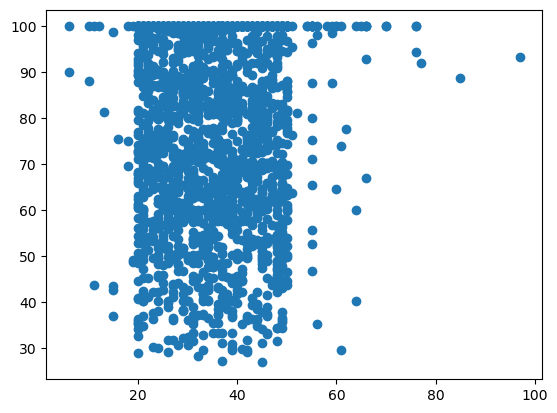

In [45]:
data = df[['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES']]
plt.scatter( df['QUANTITYORDERED'],df['PRICEEACH'])

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,22):
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

In [36]:
# Calculate the elbow point
elbow = np.diff(wcss)
elbow_index = np.argmax(elbow) + 1
elbow_index

-50.867685858913774

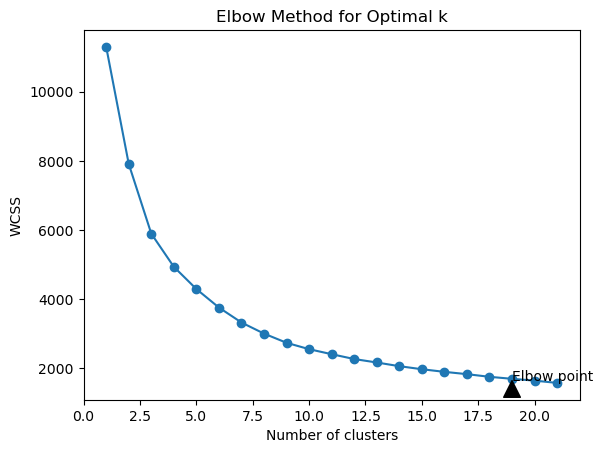

In [35]:
plt.plot(range(1,22),wcss,marker='o')
plt.annotate('Elbow point', (elbow_index, wcss[elbow_index]),  arrowprops=dict(facecolor='black'))
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [46]:
km = KMeans(n_clusters=19)
km

KMeans(n_clusters=19)

In [47]:
y_pred = km.fit_predict(data_scaled)

In [51]:
y_pred

array([0, 5, 3, ..., 1, 2, 9])

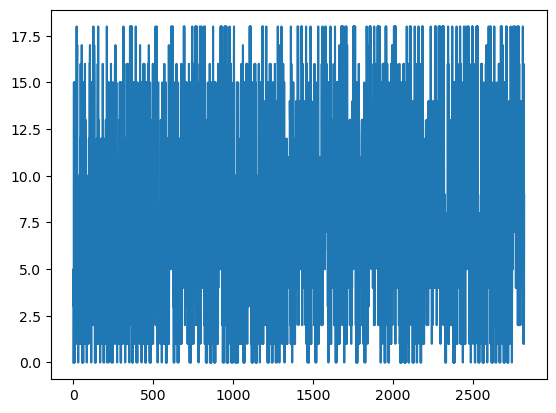

In [53]:
plt.plot(y_pred)